In [39]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
edx_orig = pd.read_csv('edx_courses.csv')
edx_orig.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [41]:
edx_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [42]:
edx_orig.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

ELIMINO LA COLUMNA 'course_syllabus' porque contiene demasiados valores nulos y no va a servir para el análisis

In [43]:
edx_orig = edx_orig.drop(['course_syllabus'], axis=1)

BUSCO CUPLICADOS

In [44]:
edx_orig.duplicated().sum()

1

ELIMINO DUPLICADOS

In [45]:
edx_orig = edx_orig.drop_duplicates()

REEMPLAZO NULOS DE LA COLUMNA 'n_enrolled' CON 0

In [46]:
edx_orig['n_enrolled'] = edx_orig['n_enrolled'].str.replace(',','')

In [47]:
edx_orig.n_enrolled

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
970        NaN
971        NaN
972      11246
973       8775
974        NaN
Name: n_enrolled, Length: 974, dtype: object

In [48]:
edx_orig['n_enrolled'] = edx_orig['n_enrolled'].fillna(0).astype(int)
edx_orig.n_enrolled

0       124980
1       293864
2      2442271
3       129555
4        81140
        ...   
970          0
971          0
972      11246
973       8775
974          0
Name: n_enrolled, Length: 974, dtype: int64

In [49]:
edx_orig.isnull().sum()

title                  0
summary               53
n_enrolled             0
course_type            0
institution            0
instructors            3
Level                  0
subject                0
language               0
subtitles              3
course_effort          0
course_length          0
price                  0
course_description    40
course_url             0
dtype: int64

CREO UNA COLUMNA NUEVA CON LOS VALORES DE LAS CERTIFICACIONES Y LE CAMBIO EL TIPO DE DATO A INT

In [50]:
edx_orig['certification_value'] = edx_orig['price'].str.replace(r'\D', '', regex = True).astype(int)
edx_orig.certification_value.head()

0     49
1     49
2     90
3    199
4    249
Name: certification_value, dtype: int64

Reemplazo 

In [51]:
edx_orig.language.value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

REEMPLAZO LOS NOMBRES DE LOS IDIOMAS QUE ESTÁN CON CARACTERES NO SOPORTADOS POR SEABORN

In [52]:
edx_orig = edx_orig.replace(to_replace="日本語",
           value="Japonés")

In [53]:
edx_orig = edx_orig.replace(to_replace="中文",
           value="Chino")

In [54]:
edx_orig = edx_orig.replace(to_replace="اللغة العربية",
           value="Árabe")

CREO UNA NUEVA COLUMNA CON EL zscore PARA ELIMINAR OUTLIERS. 

In [55]:
edx_orig['z_score']=stats.zscore(edx_orig['certification_value'])

ELIJO UN zscore DE 2 PORQUE EL STANDARD DE 3, AUN DEJA VARIOS OUTLIERS QUE COMPLICAN LA GRAFICACIÓN

In [56]:
edx_orig= edx_orig.loc[edx_orig['z_score'].abs()<=2]

HAGO UN GRÁFICO DE LA RELACIÓN ENTRE VALOR DE LA VERTIFICACIÓN Y EL NIVEL DEL CURSO. 
Como se puede ver, el nivel introductorio es el que mayor densidad de inscriptos tiene, pero el nivel avanzado es el que contiene los cursos de mayor precio. También podemos notar que los de nivel avanzado son los que más eligen la modalidad de curso con instructor y con un cronograma. En general, esa modalidad se elige mayoritariamente en los cursos más caros.

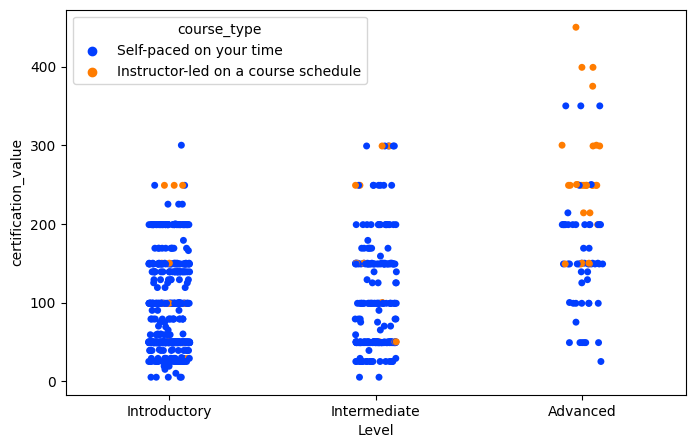

In [57]:
sns.set_palette("bright")
sns.stripplot(x="Level", y="certification_value", hue='course_type', data= edx_orig)
plt.gcf().set_size_inches(8, 5)

EL PROMEDIO DE VALOR DE LA VERTIFICACIÓN ES DE $100 Y LA MEDIANA, DE $79

In [58]:
edx_orig.mean(numeric_only=True)

n_enrolled             47006.811594
certification_value      100.006211
z_score                   -0.067381
dtype: float64

In [59]:
edx_orig.median(numeric_only=True)

n_enrolled             19915.500000
certification_value       79.000000
z_score                   -0.078491
dtype: float64

En este gráfico se puede ver que los cursos con más cantidad de alumnos son los que se dictan en inglés y en español. También son los que tienen un costo más elevado.

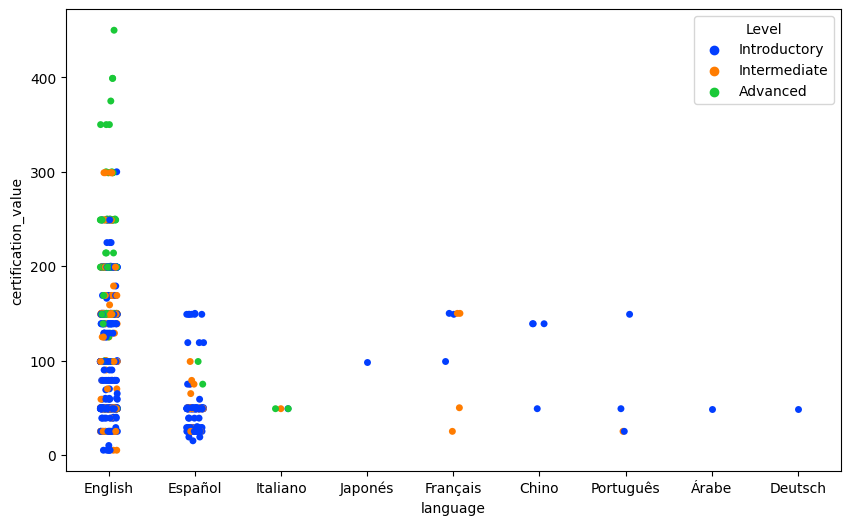

In [60]:
sns.set_palette("bright")
sns.stripplot(x="language", y="certification_value", hue='Level', data= edx_orig)
plt.gcf().set_size_inches(10, 6)

Los cursos en inglés son los que mayor cantidad de asistentes tienen.

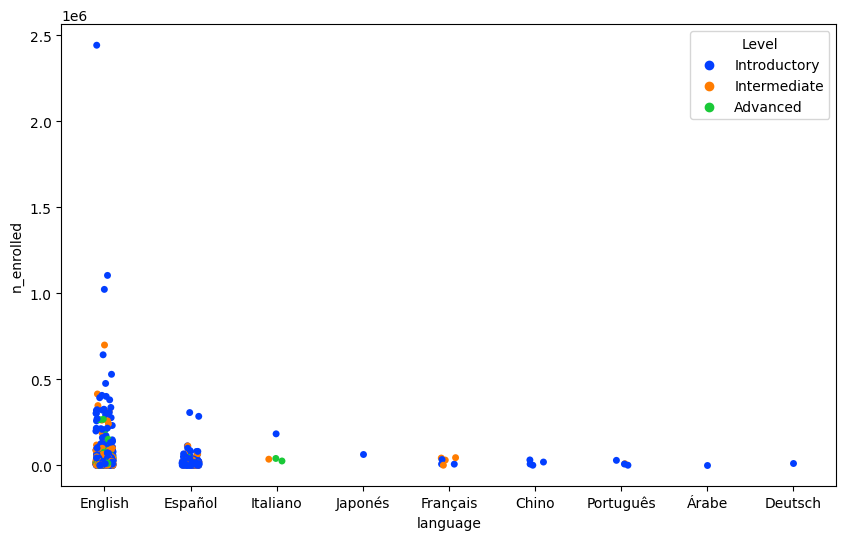

In [61]:
sns.set_palette("bright")
sns.stripplot(x="language", y="n_enrolled", hue='Level', data= edx_orig)
plt.gcf().set_size_inches(10, 6)

WORD CLOUD

Genero Wordcloud

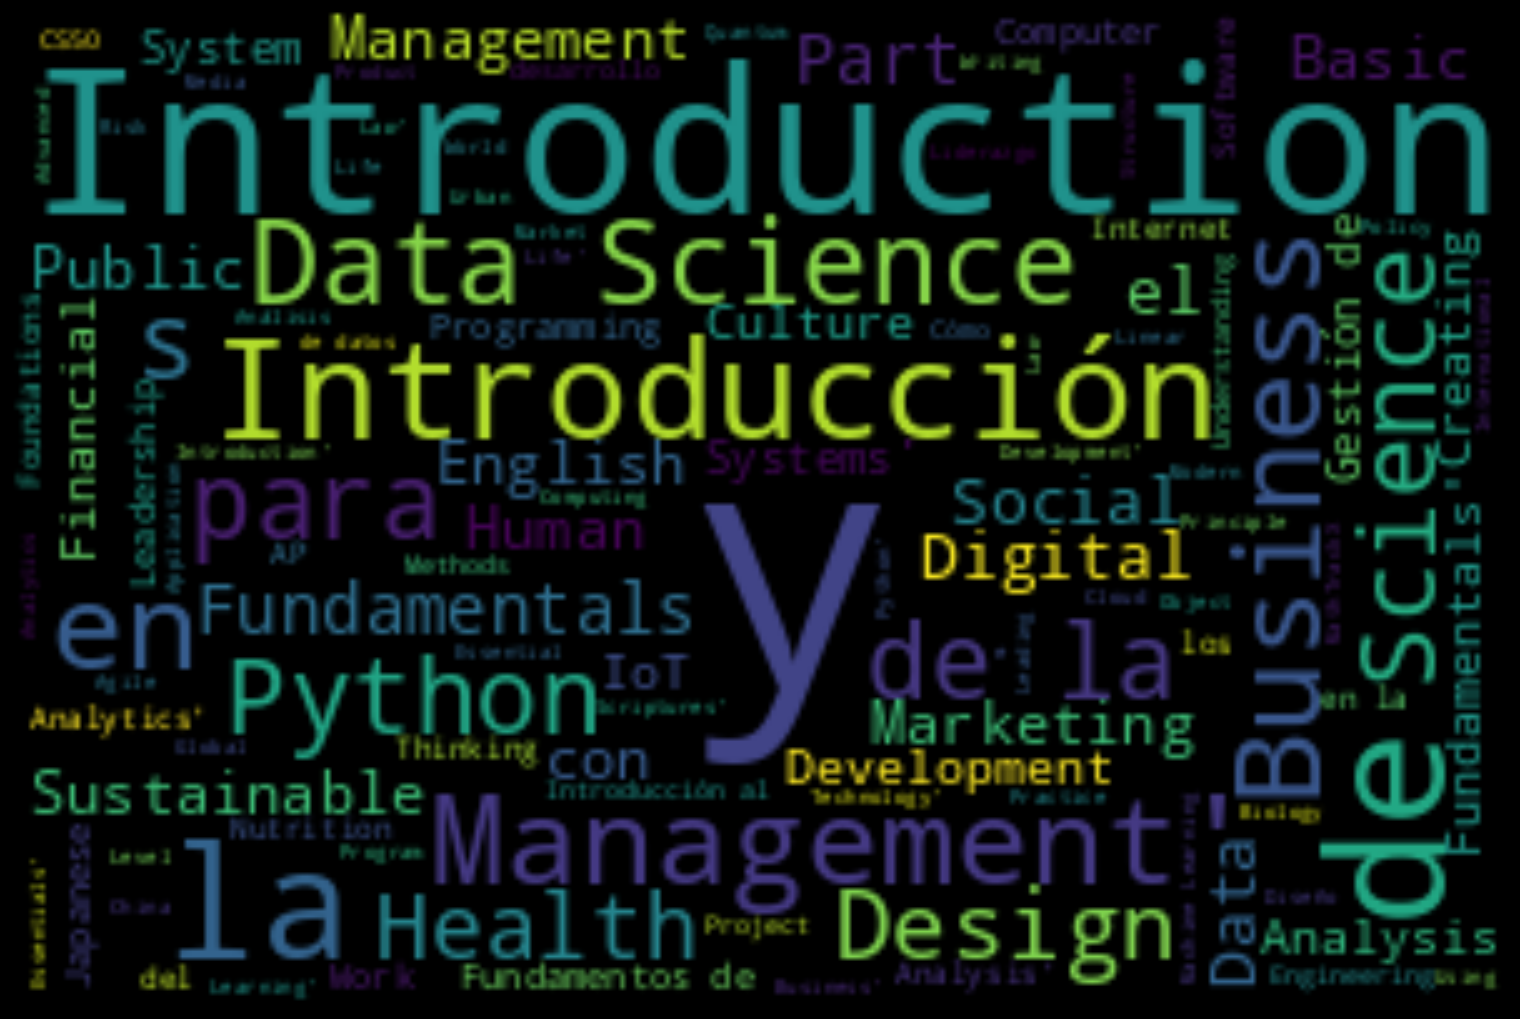

In [62]:
text = edx_orig.title.values
wordcloud = WordCloud(
    width = 300,
    height = 200,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [64]:
edx_orig = edx_orig.to_csv('edx_final.csv')